# EDA and Pre-Processing

In [1]:
import numpy as np
import pandas as pd
from collections import Counter

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%config InlineBackend.figure_formats = {'png', 'retina'}

In [3]:
#Training and testing Data

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [4]:
print(train.shape)
train.tail()

(647054, 7)


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
647049,39,191346,Sunday,3.239000e+10,1,PHARMACY OTC,1118.0
647050,39,191346,Sunday,7.874205e+09,1,FROZEN FOODS,1752.0
647051,39,191346,Sunday,4.072000e+03,1,PRODUCE,4170.0
647052,8,191347,Sunday,4.190008e+09,1,DAIRY,1512.0
647053,8,191347,Sunday,3.800060e+09,1,GROCERY DRY GOODS,3600.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647054 entries, 0 to 647053
Data columns (total 7 columns):
TripType                 647054 non-null int64
VisitNumber              647054 non-null int64
Weekday                  647054 non-null object
Upc                      642925 non-null float64
ScanCount                647054 non-null int64
DepartmentDescription    645693 non-null object
FinelineNumber           642925 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ MB


# Treating Missing Values in the Data

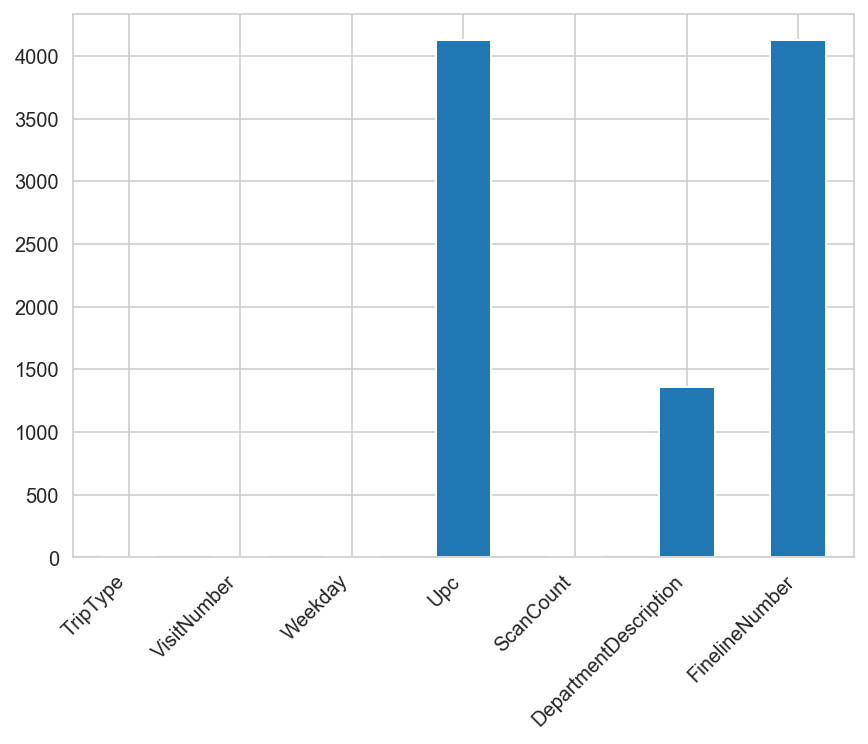

In [6]:
#Missing Values

plt.figure(figsize=(7, 5))
train.isnull().sum().plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.show()

# Encode Weekday (Labeling)

In [7]:
wd = {"Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3, 
      "Friday": 4, "Saturday": 5, "Sunday": 6}
train["Weekday"] = train["Weekday"].apply(lambda x: wd[x])
test["Weekday"] = test["Weekday"].apply(lambda x: wd[x])

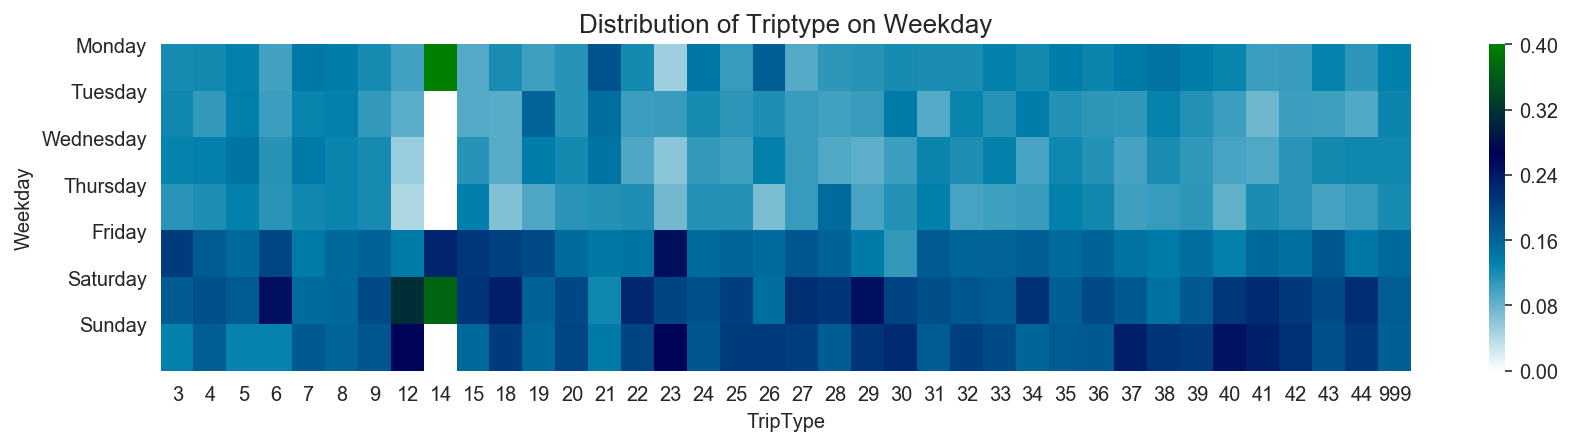

In [8]:
plt.figure(figsize=(14, 3))

sns.heatmap(data=pd.crosstab(train["Weekday"],
                             train["TripType"], 
                             values=train["VisitNumber"],
                             aggfunc='count', 
                             normalize="columns"), cmap="ocean_r")
plt.yticks(range(0,7), list(wd.keys()), rotation="horizontal")
plt.title("Distribution of Triptype on Weekday", fontsize=13)
plt.show()

# Uneven Distribution of TripType

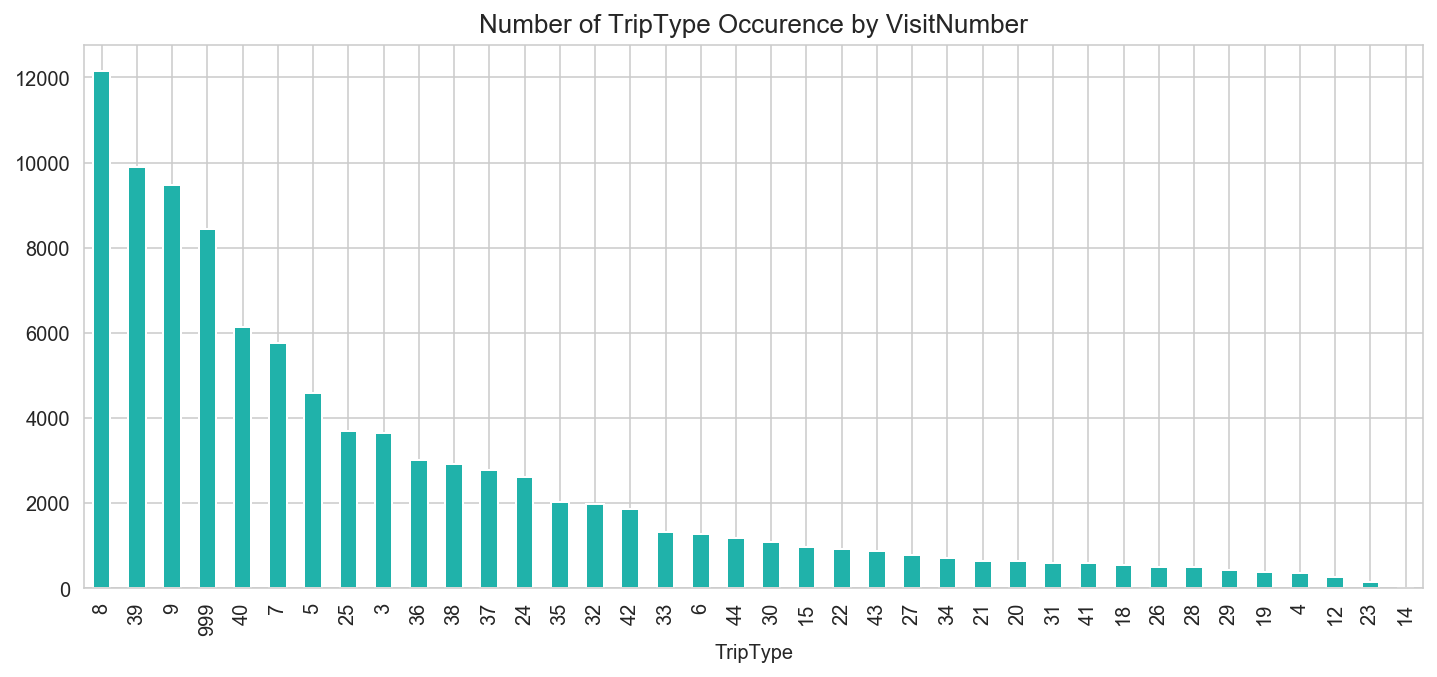

In [9]:
plt.figure(figsize=(12, 5))

sns.set_style('whitegrid')
np.sort(train.TripType.unique())
train_triptypes = train.drop_duplicates("VisitNumber")
a = train_triptypes["TripType"]
a = a.value_counts()
a.plot(kind='bar', color="lightseagreen")
plt.title("Number of TripType Occurence by VisitNumber", fontsize=13)
plt.xlabel("TripType")

plt.show()

In [10]:
#working on training dataset
train_40 = train[train["TripType"]==40]
train_40["DepartmentDescription"].value_counts()[:10]

GROCERY DRY GOODS           32639
DSD GROCERY                 22157
DAIRY                       17354
PRODUCE                     16704
PERSONAL CARE                9911
FROZEN FOODS                 9307
HOUSEHOLD CHEMICALS/SUPP     8093
COMM BREAD                   5968
HOUSEHOLD PAPER GOODS        5712
PHARMACY OTC                 4569
Name: DepartmentDescription, dtype: int64